In [47]:
import warnings
warnings.filterwarnings('ignore')
data = {
    "Reference":[
        'Lafreniere+ 2007','Lafreniere+ 2007','Lafreniere+ 2007',
        'Heinze+ 2010',
        'Janson+ 2011','Janson+ 2011','Janson+ 2011',
        'Vigan+ 2012',
        'Biller+ 2013','Biller+ 2013',
        'Nielsen+ 2013',
        'Rameau+ 2013',
        'Wahhaj+ 2013','Wahhaj+ 2013',
        'Lafreniere+ 2014','Lafreniere+ 2014',
        'Bowler+ 2015',
        'Chauvin+ 2015','Chauvin+ 2015',
        'Brandt+ 2014',
        'Bowler 2016','Bowler 2016','Bowler 2016',
        'Durkan+ 2016',
        'Galicher+ 2016',
        'Lannier+ 2016',
        'Meshkat+ 2017',
        'Stone+ 2018',
        'Naud+ 2017',
        'Baron+ 2018'
    ],
    'f %':[
       '$<$28','$<$13','$<$9.3','$<$50','$<$25','$<$15','$<$85','8.7$^{+19.6}_{-6}$',
        '$<$6','$<$7','$<$20','16.1$^{+26.3}_{-11.2}$','$<$24','$<$24',
        '4.0$^{+3.0}_{-1.2}$',
        '$<$1.8','$<$10.3','$<$15','$<$10','1.0-3.1','2.8$^{+3.7}_{-2.3}$',
        '$<$4.1','$<$3.9','$<$9','1.05$^{+2.80}_{-0.70}$','2.3$^{+2.9}_{-0.7}$',
        '6.27$^{+3.49}_{2.59}$','$\sim$25','0.84$^{+6.73}_{-0.66}$','$<$3'
    ],
    'SpT':[
        'All','All','All','FGK','BA','BA','BA','A','All','All','BA','AF','Disk','Disk',
        'All','All','M','FGK','FGK','All','BA','FGK','M','All','M','M','Disk',
        'All','K5-L5','All'
    ],
    'Sep [AU]':[
        '10-24','25-50','50-250','30-94','25-100','15-100','$<$100','5-320','10-150',
        '10-50','59-460','1-1000','$<$8','$<$63','250-1000','50-250','10-100','100-500',
        '50-500','10-100','30-300','30-300','30-300',
        '100-1000','20-300','8-400','10-100','5-100',
        '500-5000','1000-5000'
    ],
    'Mass [Mjup]':[
        '0.5-13','0.5-13','0.5-13','5-13','7-13','10-13','$<$300','3-14','1-20','1-20',
        '4-13','1-13','9-13','4-13','5-40','5-40','1-13','5-13','5-13',
        '5-13','10-13','5-70','5-13',
        '0.5-34','0.5-14','2-14','5-20','4-14','5-13','1-13'
    ]
}

df = pd.DataFrame(data=data)

df['Mass lower'], df['Mass upper'] = np.nan,np.nan
df['Sep lower'], df['Sep upper'] = np.nan,np.nan
df['Upper Limit'] = True
df['Fraction'] = np.nan

for i in range(len(df)):
    m = df['Mass [Mjup]'][i].split('-')
    if '<' in m[0]:
        mlower = 0.1
        mupper = m[0].replace('$<$','')
    else:
        mlower = m[0]
        mupper = m[1]
    df['Mass lower'][i], df['Mass upper'][i] = float(mlower), float(mupper)
    
    s = df['Sep [AU]'][i].split('-')
    if '<' in s[0]:
        slower = 0.1
        supper = s[0].replace('$<$','')
    else:
        slower = s[0]
        supper = s[1]
    df['Sep lower'][i],df['Sep upper'][i] = float(slower),float(supper)
    
    f = df['f %'][i]
    ff = f.split('$')
    if '<' in f:
        df['Fraction'][i] = float(ff[-1])
    elif '-' in ff[0]:
        fff = ff[0].split('-')
        ff[0] = fff[-1]
    elif '\sim' in f:
        df['Fraction'][i] = float(ff[-1])
    else:
        df['Fraction'][i] = float(ff[0])
        df['Upper Limit'][i] = False
    
data2 = [
    {'Reference':'Bowler+ 2018','Sep [AU]':'5-500', 'Sep upper':500, 'Sep lower':5, 
         'Mass [Mjup]':'5-13', 'Mass upper': 13, 'Mass lower':5, 
         'Fraction':1,'f %':'1', 'Upper Limit':False},
    {'Reference':'Bowler+ 2018','Sep [AU]':'5-500', 'Sep upper':500, 'Sep lower':5,
         'Mass [Mjup]':'13-74', 'Mass upper': 75, 'Mass lower':13, 
         'Fraction':4,'f %':'1-4', 'Upper Limit':False},
    {'Reference':'Fulton+ 2021','Sep [AU]':'2-8', 'Sep upper':8, 'Sep lower':2, 
         'Mass [Mjup]':'0.1-13', 'Mass upper': 13, 'Mass lower':0.1, 
         'Fraction':14,'f %':'14', 'Upper Limit':False},
    {'Reference':'Fulton+ 2021','Sep [AU]':'8-32', 'Sep upper':32, 'Sep lower':8, 
         'Mass [Mjup]':'0.1-13', 'Mass upper': 13, 'Mass lower':0.1, 'Fraction':9,
        'f %':'8.9$^{+3.0}_{-2.4}$', 'Upper Limit':False},
    {'Reference':'Fernandes+ 2019','Sep [AU]':'0.1-100', 'Sep upper':100, 'Sep lower':0.1, 
         'Mass [Mjup]':'0.1-20', 'Mass upper': 20, 'Mass lower':0.1, 
         'Fraction':26.6, 'f %':'26.6$^{+7.5}_{-5.4}$', 'Upper Limit':False},
    {'Reference':'Fernandes+ 2019','Sep [AU]':'0.1-100', 'Sep upper':100, 'Sep lower':0.1, 
         'Mass [Mjup]':'1-20', 'Mass upper': 20, 'Mass lower':1, 
         'Fraction':6.2, 'f %':'6.2$^{+1.5}_{-1.2}$', 'Upper Limit':False},
    {'Reference':'Bryan+ 2016','Sep [AU]':' 5-20', 'Sep upper':20, 'Sep lower':5, 
         'Mass [Mjup]':'1-20', 'Mass upper': 20, 'Mass lower':1, 
         'Fraction':52, 'f %':'52$\pm$5', 'Upper Limit':False},
    {'Reference':'Cassan+ 2012','Sep [AU]':'0.5-10', 'Sep upper':10, 'Sep lower':0.5, 
         'Mass [Mjup]':'0.3-10', 'Mass upper': 10, 'Mass lower':0.3, 
         'Fraction':17, 'f %':'17$^{+6}_{-9}$', 'Upper Limit':False},
    {'Reference':'Cassan+ 2012','Sep [AU]':'0.5-10', 'Sep upper':10, 'Sep lower':0.5, 
         'Mass [Mjup]':'0.03-0.09', 'Mass upper': 0.09, 'Mass lower':0.03, 
         'Fraction':52, 'f %':'52$^{+22}_{-29}$', 'Upper Limit':False},
    {'Reference':'Cassan+ 2012','Sep [AU]':'0.5,10','Sep upper':10, 'Sep lower':0.5, 
         'Mass [Mjup]':'0.015-0.03', 'Mass upper': 0.03, 'Mass lower':0.015, 
         'Fraction':62, 'f %':'62$^{+35}_{-37}$', 'Upper Limit':False},
    {'Reference':'Poleski+ 2021','Sep [AU]':'5-15', 'Sep upper':15, 'Sep lower':5, 
         'Mass [Mjup]':'0.03-3','Mass upper': 0.3, 'Mass lower':0.03, 
         'Fraction':150, 'f %':'1.5 ice giants per star', 'Upper Limit':False},
    {'Reference':'Nielsen+ 2019','Sep [AU]':'10-100', 'Sep upper':100, 'Sep lower':10, 
         'Mass [Mjup]':'5-13','Mass upper': 13, 'Mass lower':5, 
         'Fraction':3.5, 'f %':'3.5$^{+1.9}_{-1.4}$', 'Upper Limit':False},
    {'Reference':'Nielsen+ 2019','Sep [AU]':'10-100', 'Sep upper':100, 'Sep lower':10, 
         'Mass [Mjup]':'5-80','Mass upper': 80, 'Mass lower':5, 
         'Fraction':0.8, 'f %':'0.8$^{+0.8}_{-0.5}$', 'Upper Limit':False},
    {'Reference':'Vigan+ 2021','Sep [AU]':'5-300', 'Sep upper':300, 'Sep lower':5, 
         'Mass [Mjup]':'1-75','Mass upper': 75, 'Mass lower':1, 
         'Fraction':10, 'f %':'5.7$^{+3.8}_{-2.8}$', 'Upper Limit':False},
]

df = df.append(data2)
df = df.reset_index(drop=True)

#refs = np.unique(df['Reference'])
refs = np.argsort(df['Reference'])
df = df.loc[refs]
df = df.reset_index(drop=True)

import string
letters = list(string.ascii_lowercase)
numbers = [int(f) for f in np.arange(1,30,1)]
letters = letters + numbers
df['Reference Letter'] = np.nan
for i in range(len(df)):
    df['Reference Letter'][i] = letters[i]
    
df['Reference Letter Without Upper Limits'] = np.nan
j = 0
for i in range(len(df)):
    if df['Upper Limit'][i]:
        pass
    else:
        df['Reference Letter Without Upper Limits'][i] = letters[j]
        j += 1
    

df

,Reference,f %,SpT,Sep [AU],Mass [Mjup],Mass lower,Mass upper,Sep lower,Sep upper,Upper Limit,Fraction,Reference Letter,Reference Letter Without Upper Limits
0,Baron+ 2018,$<$3,All,1000-5000,1-13,1.000,13.00,1000.0,5000.0,True,3.00,a,NaN
1,Biller+ 2013,$<$7,All,10-50,1-20,1.000,20.00,10.0,50.0,True,7.00,b,NaN
2,Biller+ 2013,$<$6,All,10-150,1-20,1.000,20.00,10.0,150.0,True,6.00,c,NaN
3,Bowler 2016,$<$3.9,M,30-300,5-13,5.000,13.00,30.0,300.0,True,3.90,d,NaN
4,Bowler 2016,2.8$^{+3.7}_{-2.3}$,BA,30-300,10-13,10.000,13.00,30.0,300.0,False,2.80,e,a
5,Bowler 2016,$<$4.1,FGK,30-300,5-70,5.000,70.00,30.0,300.0,True,4.10,f,NaN
6,Bowler+ 2015,$<$10.3,M,10-100,1-13,1.000,13.00,10.0,100.0,True,10.30,g,NaN
7,Bowler+ 2018,1-4,NaN,5-500,13-74,13.000,75.00,5.0,500.0,False,4.00,h,b
8,Bowler+ 2018,1,NaN,5-500,5-13,5.000,13.00,5.0,500.0,False,1.00,i,c
9,Brandt+ 2014,1.0-3.1,All,10-100,5-13,5.000,13.00,10.0,100.0,True,NaN,j,NaN


In [48]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

In [49]:
planets = NasaExoplanetArchive.query_criteria(table="pscomppars", select="*") 
p = planets.to_pandas()

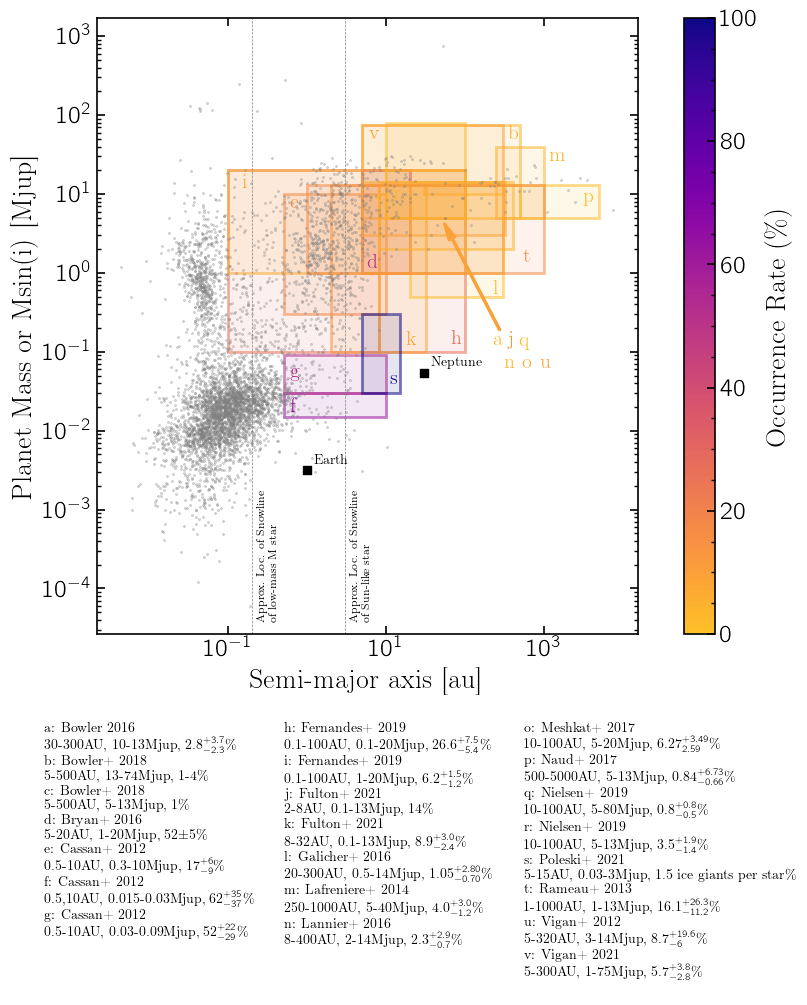

In [61]:
def AddRectangle(ml,mh,al,ah,lw,ls,edgecolor,alpha):
    w = ah - al
    h = mh - ml
    r = Rectangle([al,ml], w, h, linewidth=lw, ls = ls, edgecolor=edgecolor,
                  facecolor='None', alpha=alpha)
    plt.gca().add_patch(r)
    
def AddFilledRectangle(ml,mh,al,ah,lw,ls,edgecolor,facecolor,alpha):
    w = ah - al
    h = mh - ml
    r = Rectangle([al,ml], w, h, linewidth=lw, ls = ls, edgecolor=edgecolor,
                  facecolor=facecolor, alpha=alpha)
    plt.gca().add_patch(r)
    
%matplotlib inline
from matplotlib.patches import Rectangle

def MakePlot(plot_upperlimits = True, savename = 'exoplanet-occurrence-rates-version2.png',
            colormap = 'magma', ncolumns = 4, figsize=(12,8), xtxt = [0.16,0.36,0.56,0.76],
            color_vmin = -0.1, color_vmax = 1):
    import matplotlib
    cmap = matplotlib.cm.get_cmap(colormap)

    fig = plt.figure(figsize=figsize)
    # Plot planets:
    plt.plot(p['pl_orbsmax'],p['pl_bmassj'], marker='.', markersize=3, color='grey', ls='None', alpha=0.3)

    # Mark snowlines:
    plt.axvline(x=3, ls='--', lw=0.5, color='grey')
    plt.axvline(x=0.2, ls='--', lw=0.5, color='grey')
    plt.annotate('Approx. Loc. of Snowline \n of Sun-like star', xy = (3.5,4e-5), rotation=90,
                fontsize = 8)
    plt.annotate('Approx. Loc. of Snowline \n of low-mass M star', xy = (0.23,4e-5), rotation=90,
                fontsize = 8)

    # Plot solar system planets
    plt.scatter(30.07,0.0539531012, marker='s', color='black')
    plt.annotate('Neptune', xy=(30.07,0.0539531012), xytext=(5,5), textcoords='offset points')
    plt.scatter(1,0.00314558, marker='s', color='black')
    plt.annotate('Earth', xy=(1,0.00314558), xytext=(5,5), textcoords='offset points')

    if plot_upperlimits:
        groupx = +90
        groupy = -130
        offsetdict = {'a':[+27,-60], 'b':[groupx,groupy], 'c':[groupx+15,groupy], 
         'd':[groupx,groupy+10], 'e':[+5,-10], 'f':[groupx-30,groupy-10],
         'g':[groupx+10,groupy-10], 'h':[groupx+40,groupy-10], 'i':[+10,-12],
         'j':[+10,-10], 'k':[+3,-70], 'l':[+65,-25],
         'm':[+10,-80], 'n':[+65,-15], 'o':[groupx-60,groupy-30], 
         'p':[groupx-30,groupy-30], 'q':[+40,-100], 'r':[+10,-70],
         's':[+10,-120], 't':[groupx+30,groupy-30], 'u':[+10,-110],
         'v':[groupx+20,groupy-30], 'w':[groupx-30,groupy-45], 'x':[groupx-10,groupy-45],
         'y':[groupx+20,groupy-45], 'z':[+10,-10], '1':[groupx+45,groupy-45],
         '2':[groupx-40,groupy-60], '3':[groupx-7,groupy-60], '4':[+5,-10],
         '5':[+38,-10], '6':[groupx+40,groupy-62], '7':[groupx+50,groupy-70],
         '8':[+45,-12], '9':[groupx-45,groupy-77], '10':[+9,-20],
         '11':[+155,-55], '12':[groupx+30,groupy-78], '13':[groupx+50,groupy-78],
         '14':[+10,-30], '15':[+10,-5]}
    else:
        groupx = +90
        groupy = -100
        offsetdict = {'a':[groupx-40,groupy-15],'b':[+105,-10], 'c':[+10,-12],
                      'd':[+3,-70], 'e':[+5,-10],
                     'f':[+5,-13], 'g':[+5,-15], 'h':[+160,-125],
                     'i':[+10,-12], 'j':[groupx+37,groupy-15], 'k':[+20,-115],
                     'l':[+60,-80],
                     'm':[+38,-10], 'n':[groupx,groupy-33], 'o':[groupx+22-14,groupy-42],
                     'p':[+45,-12], 'q':[groupx+6, groupy-60], 'r':[+5,-10], 's':[+20,-50],
                     't':[+155,-55], 'u':[groupx+52-14,groupy-33], 'v':[+5,-10]
                    }
        
    norm = matplotlib.colors.Normalize(vmin=color_vmin, vmax=color_vmax)
    for i in range(len(df)): 
        if df['Upper Limit'][i]:
            if plot_upperlimits:
                alpha = 0.5
                ml, mh = df['Mass lower'][i],df['Mass upper'][i]
                al, ah = df['Sep lower'][i],df['Sep upper'][i]
                ls = '-.'
                lw = 2
                edgecolor = cmap(norm(df['Fraction'][i]/100))
                AddRectangle(ml,mh,al,ah,lw,ls,edgecolor,alpha)
                plt.annotate(df['Reference Letter'][i], xy = (al,mh), 
                         xytext = offsetdict[str(df['Reference Letter'][i])], 
                      textcoords='offset points', color=edgecolor, fontsize=15)
            else:
                pass
        else:
            alpha = 0.1
            ml, mh = df['Mass lower'][i],df['Mass upper'][i]
            al, ah = df['Sep lower'][i],df['Sep upper'][i]
            ls = '-'
            lw = 2
            facecolor = cmap(norm(df['Fraction'][i]/100))
            edgecolor = cmap(norm(df['Fraction'][i]/100))
            AddFilledRectangle(ml,mh,al,ah,lw,ls,edgecolor,facecolor,alpha)
            AddRectangle(ml,mh,al,ah,lw,ls,edgecolor,0.5)
            if plot_upperlimits:
                plt.annotate(df['Reference Letter'][i], xy = (al,mh), 
                         xytext = offsetdict[str(df['Reference Letter'][i])], 
                      textcoords='offset points', color=edgecolor, fontsize=15)
            else:
                plt.annotate(df['Reference Letter Without Upper Limits'][i], xy = (al,mh), 
                             xytext = offsetdict[str(df['Reference Letter Without Upper Limits'][i])], 
                          textcoords='offset points', color=edgecolor, fontsize=15)

    plt.annotate('',xy = (50,5), xytext = (300,0.16), xycoords = 'data', textcoords='data',
                 arrowprops=dict(facecolor=cmap(norm(0.1)), shrink=0.05, lw=2,
                                edgecolor=cmap(norm(0.1)), width = 0.5, headwidth=5))

    if plot_upperlimits:
        inds = np.linspace(0,len(df),ncolumns+1)
        inds = [int(ind) for ind in inds]
        for i in range(1,len(inds)):
            txt = r''
            for j in range(len(df))[inds[i-1]:inds[i]]:
                txt += str(df['Reference Letter']) + ': ' + str(df['Reference'][j]) + '\n'
                txt += str(df['Sep [AU]'][j]) + ' AU, '+ str(df['Mass [Mjup]'][j]) +\
                                ' Mjup, ' +str(df['f %'][j]) + '\% \n'
            fig.text(xtxt[i-1], 0, txt, ha='left', va='top')
    else:
        not_upper_limits = np.where(~df['Upper Limit'])[0]
        inds = np.linspace(0,len(not_upper_limits),ncolumns+1)
        inds = [int(ind) for ind in inds]
        for i in range(1,len(inds)):
            txt = r''
            for j in not_upper_limits[inds[i-1]:inds[i]]:
                txt += str(df['Reference Letter Without Upper Limits'][j]) + ': ' + \
                                str(df['Reference'][j]) + '\n'
                txt += str(df['Sep [AU]'][j]) + 'AU, '+ str(df['Mass [Mjup]'][j]) +\
                            'Mjup, ' +str(df['f %'][j]) + '\% \n'
            fig.text(xtxt[i-1], 0, txt, ha='left', va='top')
                
        
    img = plt.imshow(np.array([[0,100]]), cmap=cmap, vmin=color_vmin*100, vmax=color_vmax*100)
    img.set_visible(False)
    cbar = plt.colorbar(orientation="vertical")
    cbar.ax.set_ylabel('Occurrence Rate (\%)')
    cbar.ax.set_ylim(bottom = 0)

    plt.gca().set_xscale('log')
    plt.gca().set_yscale('log')
    plt.xlabel('Semi-major axis [au]')
    plt.ylabel('Planet Mass or Msin(i) [Mjup]')
    plt.savefig(savename,bbox_inches='tight')
    plt.show()

#MakePlot(plot_upperlimits = True, savename = 'exoplanet-occurrence-rates-withupperlimits.png')
MakePlot(plot_upperlimits = False, savename = 'exoplanet-occurrence-rates.png',
        colormap = 'plasma_r', figsize=(12,8), ncolumns = 3, xtxt = [0.25,0.45,0.65],
        color_vmin = -0.15, color_vmax = 1)